In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns


In [ ]:
#read the data using pandas library
data = pd.read_csv("/content/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#checking if there are any 0 values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
#know the dimension of the data i.e the number of rows and columns
#here we have 200 rows and 5 columns
data.shape

(200, 5)

In [ ]:
#converting continous data into discrete data
TV = data["TV"]
for i in range(len(TV)):
  TV[i] = round(TV[i])
data["TV"] = TV

In [ ]:
#converting continous data into discrete data
Radio = data["Radio"]
for i in range(len(Radio)):
  Radio[i] = round(Radio[i])
data["Radio"] = Radio

In [ ]:
#converting continous data into discrete data
Newspaper = data["Newspaper"]
for i in range(len(Newspaper)):
  Newspaper[i] = round(Newspaper[i])
data["Newspaper"] = Newspaper

In [ ]:
#converting continous data into discrete data
Sales = data["Sales"]
for i in range(len(Sales)):
  Sales[i] = round(Sales[i])
data["Sales"] = Sales

In [ ]:
#After preprocessing
data


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.0,38.0,69.0,22.0
1,2,44.0,39.0,45.0,10.0
2,3,17.0,46.0,69.0,9.0
3,4,152.0,41.0,58.0,18.0
4,5,181.0,11.0,58.0,13.0
...,...,...,...,...,...
195,196,38.0,4.0,14.0,8.0
196,197,94.0,5.0,8.0,10.0
197,198,177.0,9.0,6.0,13.0
198,199,284.0,42.0,66.0,26.0


In [ ]:
#Selecting the dependent variables
x = data.iloc[:,1:4].values

In [ ]:
#Selecting the independent variables
y = data.iloc[:,-1].values

In [ ]:
#Splitting the datasets
"""we are going to split the data into two datasets. One dataset is used for training the model and the other dataset is used for testing the model.
x_train,y_train are used for training purpose of the model and x_test,y_test are used for testing the model."""
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
#linear Regression model 1
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Training the model
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Testing the Accuracy of the model
model.score(x_train,y_train)

0.8989945901669975

In [ ]:
#Support vector machine model 2
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [ ]:
#Testing the Accuracy of the model
classifier.score(x_train,y_train)

0.73125

In [ ]:
#Decision Tree Classifier model 3
from sklearn.tree import DecisionTreeClassifier  
classifier2= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Testing the Accuracy of the model
classifier2.score(x_train,y_train)

1.0

In [ ]:
#Make Predictions on new dataset which is not used while training the model.
#LinearRegression model
expected = y_test
predicted = model.predict(x_test)
print(predicted)
print(expected)

[18.13637939  6.6294076  11.90737453 12.00954702 13.87534057 21.80943225
 15.29888938  9.96007504 15.31934723 12.59325668 10.62013663 20.49243198
  5.84165723 16.25329566 12.27794383  8.98601911 18.6328346  22.86172821
 17.85294409  9.38052088 19.30671709 19.9216418  15.24623901 13.64458435
 23.07183625  9.29304586  8.90686578 13.91318452 17.83226567 14.54684289
 23.23319896 14.45859491 12.21539445 21.53026139  8.04195529 10.2182395
 17.56905731 12.05617065  9.78455156 10.37287087]
[20.  9. 12. 13. 12. 25. 15. 11. 16.  7. 12. 23.  8. 17. 12.  8. 17. 24.
 15. 11. 21. 21. 16. 14. 25. 11. 10. 13. 19. 12. 24. 16. 10. 23. 10.  9.
 15. 13. 10. 12.]


In [ ]:
dataset = pd.DataFrame({'Actual' : expected,"Predicted" : predicted})
dataset
#The model predicted with 90% accuracy with some wrong prediction.

,Actual,Predicted
0,7.0,7.059339
1,12.0,15.445276
2,10.0,11.627599
3,26.0,23.817417
4,24.0,22.933826
5,14.0,14.178361
6,7.0,13.175605
7,9.0,6.676032
8,12.0,13.727057
9,13.0,13.415233


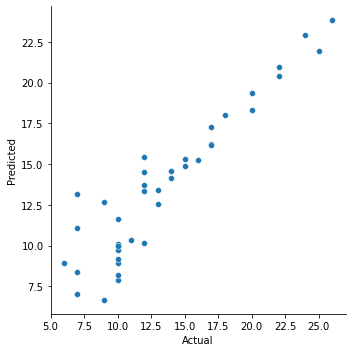

In [ ]:
sns.relplot(data=dataset, x="Actual", y="Predicted")

In [ ]:
#Make Predictions on new dataset which is not used while training the model.
#Support vector machine model
expected1 = y_test
predicted1 = classifier.predict(x_test)
print(predicted1)
print(expected1)

[ 7. 13.  9. 26. 24. 13.  7.  9. 13. 13. 13. 16.  7.  7. 15. 18.  9. 10.
  9. 23.  6. 24.  7. 19. 10. 11. 10. 15. 13. 15. 11. 21. 20. 12. 15. 11.
 12. 18.  8. 11.]
[ 7. 12. 10. 26. 24. 14.  7.  9. 12. 13. 15. 17.  9.  6. 17. 18. 10. 10.
 10. 25.  7. 22.  7. 20. 10. 12. 10. 14. 12. 15. 10. 22. 20. 12. 16. 10.
 13. 17. 10. 11.]


In [ ]:
dataset2 = pd.DataFrame({'Actual' : expected1,"Predicted" : predicted1})
dataset2
#The model predicted with 72% accuracy.

,Actual,Predicted
0,7.0,7.0
1,12.0,13.0
2,10.0,9.0
3,26.0,26.0
4,24.0,24.0
5,14.0,13.0
6,7.0,7.0
7,9.0,9.0
8,12.0,13.0
9,13.0,13.0


In [ ]:
#Make Predictions on new dataset which is not used while training the model.
#Decision tree model
expected2 = y_test
predicted2 = classifier2.predict(x_test)
print(predicted2)
print(expected2)

[ 7. 13.  9. 26. 26. 13.  9.  9. 13. 12. 15. 16.  9.  6. 16. 18. 10. 10.
 10. 25.  9. 24.  8. 18. 10. 11. 10. 15. 12. 17. 10. 22. 19. 12. 16. 10.
 14. 19.  8. 11.]
[ 7. 12. 10. 26. 24. 14.  7.  9. 12. 13. 15. 17.  9.  6. 17. 18. 10. 10.
 10. 25.  7. 22.  7. 20. 10. 12. 10. 14. 12. 15. 10. 22. 20. 12. 16. 10.
 13. 17. 10. 11.]


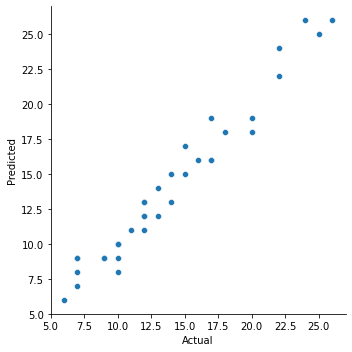

In [ ]:
sns.relplot(data=dataset2, x="Actual", y="Predicted")

In [ ]:
dataset3 = pd.DataFrame({'Actual' : expected2,"Predicted" : predicted2})
dataset3
#The model predicted with 98% accuracy with some wrong prediction.

,Actual,Predicted
0,7.0,7.0
1,12.0,13.0
2,10.0,9.0
3,26.0,26.0
4,24.0,26.0
5,14.0,13.0
6,7.0,9.0
7,9.0,9.0
8,12.0,13.0
9,13.0,12.0


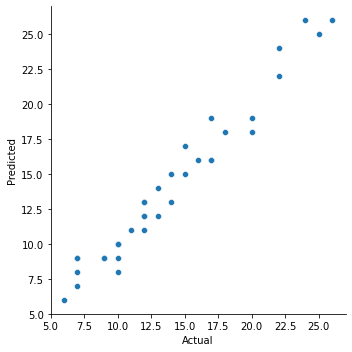

In [ ]:
sns.relplot(data=dataset3, x="Actual", y="Predicted")